<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EC%8B%A4%EC%8A%B5_%EC%82%AC%EC%9A%A9%EC%9E%90_%ED%96%89%EB%8F%99_%EC%9D%B8%EC%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Activity Recognition Using Smartphones Data set

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt파엘이는 피처 이름 index와 피처명이 공백으로 분리되어있다. 이를 dataframe으로 로드
feature_name_df=pd.read_csv('drive/MyDrive/human_activity/features.txt',sep='\s+',
                            header=None,names=['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 보면 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 되어있음을 유추할 수 있다. 위에서 피처명을 가지고 있는 feature_info.txt는 중복된 피처명을 가지고 있다. 이 중복된 피처명들을 이용해 데이터 파일을 데이터 세트 DataFrame에서 유추하면 오류가 발생한다. 

In [9]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


총 42개의 피처명이 중복돼있다. 이 중복된 피처명에 대해서는 원본 피처명에 _1,_2를 추가로 부여해 새로운 피처명을 가지를 dataframe을 반환하는 함수인 get_new_feature_name_df를 생성하겠다

In [16]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # print(new_feature_name_df.info())
    
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    # print(new_feature_name_df.info())
    return new_feature_name_df

In [17]:
import pandas as pd

def get_human_dataset() :
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로
    # read_csv에서 공백 문자를 sep로 할당
    feature_name_df = pd.read_csv('drive/MyDrive//human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩
    # 칼럼명은 feature_name 적용
    X_train = pd.read_csv('drive/MyDrive//human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('drive/MyDrive//human_activity/test/X_test.txt', sep = '\s+', names = feature_name )
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩
    # 칼럼명은 action으로 부여
    y_train = pd.read_csv('drive/MyDrive//human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('drive/MyDrive//human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [19]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [20]:
# 레이블 값은 1, 2, 3, 4, 5, 6의 6개 값이고
# 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있다
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복시마다 동일한 예측 결과 도출을 위해 random_state결정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("결정트리 예측 정확도 : {0:.4f}".format(accuracy))

#DecisionTreeClassfier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n",dt_clf.get_params())

결정트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


약 85.48%의 정확도를 나타내고 있다. 이번에는 결정 트리의 트리 깊이가 예측 정확도에 주는 영향을 살펴보겠다. GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터이 max_depth 값을 변화시키면서 예측 성능을 확인해보겠다.





In [23]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24]}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('Gridsearch 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearch 최적 하이퍼 파라미터 :',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


Gridsearch 최고 평균 정확도 수치: 0.8513
GridSearch 최적 하이퍼 파라미터 : {'max_depth': 16}


max_depth=16일때 5개의 폴드 세트의 최고 평균 정확도 결과가 85.13%로 도출됐다.
5개의 CV세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_results_ 속성을 통해 살펴보겠다. 

In [25]:
#GridSearCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 티ㅔ스트 세트 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정해보겠다. 

In [26]:
max_depth=[6,8,10,12,16,20,24]
#max_dapth값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depth:
  dt_clf=DecisionTreeClassifier(max_depth=depth,random_state=156)
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth={0} 정확도 : {1:.4f}'.format(depth,accuracy))

max_depth=6 정확도 : 0.8558
max_depth=8 정확도 : 0.8707
max_depth=10 정확도 : 0.8673
max_depth=12 정확도 : 0.8646
max_depth=16 정확도 : 0.8575
max_depth=20 정확도 : 0.8548
max_depth=24 정확도 : 0.8548


8일때 가장 높은 정확도를 나타낸다. 그리고 커질수록 정확도는 낮아지고 있다. 이론이 맞군.

In [29]:
#max_depth,min_samples_split를 같이 변경하면서 정확도 성능을 튜닝해보겠다.
params={
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24],
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


GridSearchCV객체의 grid_cv의 속성인 best_estimator_ 는 최적 하이퍼 파라미터이 max_depth 8, min_samples_split 16으로 학습이 완료된 estimator 객체이다. 

In [30]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print("결정 트리 에측 정확도:{0:.4f}".format(accuracy))

결정 트리 에측 정확도:0.8717


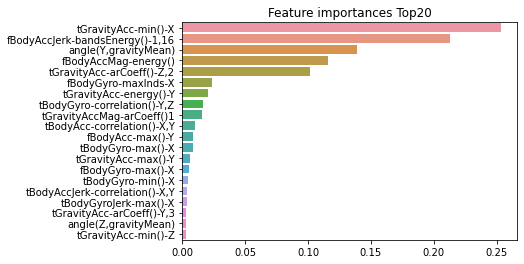

In [31]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
#Top중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 ㅜ십게 표현하기 위한 series변환
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
#중요도값 순으로 Series값을 정렬
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()